In [3]:
import numpy as np
from sklearn.datasets import fetch_openml

### MNIST Dataset

In [4]:
mnist = fetch_openml("mnist_784")
X = mnist.data / 255.0
y = mnist.target
X.shape, y.shape

((70000, 784), (70000,))

Конвертация данных в Pandas датафрейм

In [5]:
import pandas as pd

feat_cols = ['pixel' + str(i) for i in range(X.shape[1])]

df = pd.DataFrame(X, columns=feat_cols)
df['label'] = y
df['label'] = df['label'].apply(lambda i: str(i))

X, y = None, None

print('Size of the dataframe: {}'.format(df.shape))


Size of the dataframe: (70000, 785)


Так как обучающие примеры в датафрейме упорядочены по классам, нам потребуется вектор индексов со случайным порядком, чтобы перемешать примеры

In [6]:
rndperm = np.random.permutation(df.shape[0])

Визуализируем случайные изображения

__matshow__ позволяет визуализировать 2D матрицу или массив как цветное изображение

<Figure size 432x288 with 0 Axes>

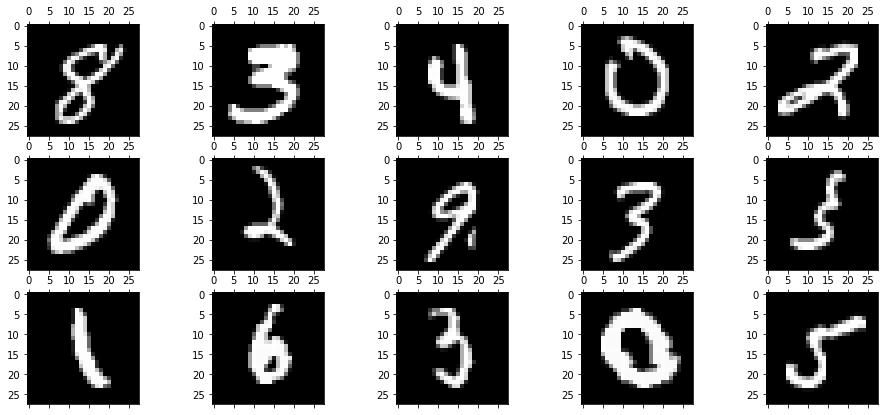

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16, 7) )
for i in range(0, 15):
    ax = fig.add_subplot(3, 5, i+1) 
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show();

### PCA

PCA - метод уменьшения числа измерений в выборке с сохранением основной информации о данных [ссылка](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82).

Выделим 3 главных компоненты изображений

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)

df['PC1'] = pca_result[:, 0]
df['PC2'] = pca_result[:, 1] 
df['PC3'] = pca_result[:, 2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09746116 0.07155445 0.06149531]


Первые три компоненты описывают ~23% исходных распределений данных

In [11]:
from pandas import Timestamp

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

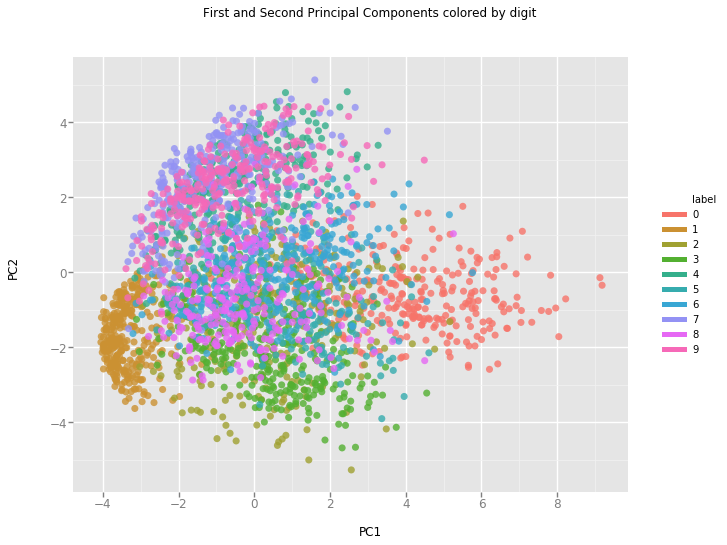

<ggplot: (-9223371915535941835)>

In [13]:
from ggplot import *

chart = ggplot( df.loc[rndperm[:3000],:], aes(x='PC1', y='PC2', color='label') ) \
        + geom_point(size=50, alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")
chart

### T-Distributed Stochastic Neighbouring Entities (t-SNE)

T-SNE основано на уменьшении различия между двумя распределениями: распределением попарной схожести (расстояния) входных объектов и распределением попарной схожести соответствующих объектов (точек) в пространстве небольшой размерности.

Метод требователен к ресурсам, поэтому при большом числе признаков рекомендуется использовать PCA (для разреженных данных - TruncatedSVD).

In [14]:
import time

from sklearn.manifold import TSNE

n_sne = 7000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df.loc[rndperm[:n_sne],feat_cols].values)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.760s...
[t-SNE] Computed neighbors for 7000 samples in 77.390s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 2.227163
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.307472
[t-SNE] KL divergence after 300 iterations: 2.431075
t-SNE done! Time elapsed: 121.10998630523682 seconds


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

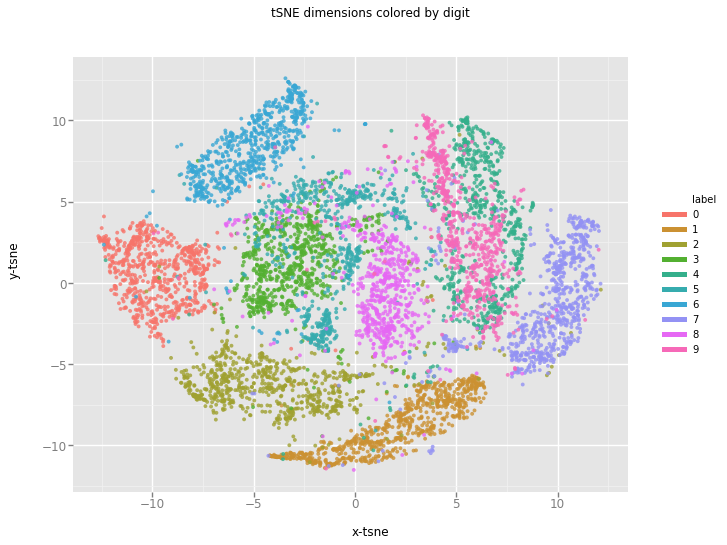

<ggplot: (121262624681)>

In [15]:
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=15,alpha=0.8) \
        + ggtitle("tSNE dimensions colored by digit")
chart

Также можно обработать данные сначала с помощью PCA или TruncatedSVD, оставив, например, 50 признаков, а затем уменьшить размерность с помощью t-SNE.
Однако, важно помнить, что сложность вычисления t-SNE растет как квадрат от числа сэмплов, соответственно, если в датасете сотни тысяч или миллионы объектов, то данный метод становится непрактичным.